# Dice Game Monte Carlo 

In [7]:
# Imports 
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
import collections 


In [3]:
def roll_dice():
    return (random.randint(1,6))


In [4]:
def prob_below(data, n = 10):
    prob = sum(1 for x in data if x < n) / len(data) * 100
    return(prob)


In [5]:
def plot_distribution(data, title = "Title", 
                            xlab = "Number of Turns", 
                            ylab = "Frequency"): 
    sns.kdeplot(data)
    plt.axvline(x = statistics.mean(data), color = 'red')
    plt.title(title, fontsize = 14)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.show()

#### Expected Value of a Dice Throw 

In [8]:
# Dice throw function
def dice_throw():
    dice_one = roll_dice()
    dice_two = roll_dice()
    
    score = dice_one + dice_two 
    
    # Dice rules 
    if (dice_one == 1) or (dice_two == 1):
        score = 0 
    elif  (dice_one == dice_two):
        score = score * 2 
    return(score)

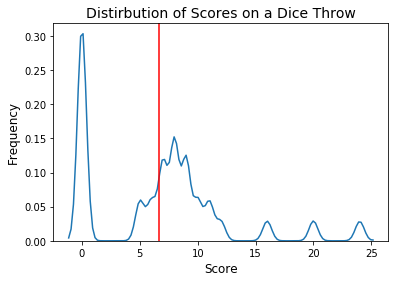

In [164]:
games = []

# Simulate 1,000,000 tosses
for i in range(1000000):
    games.append(dice_throw())

plot_distribution(games, 
                  title = 'Distirbution of Scores on a Dice Throw',
                  xlab = 'Score')

In [46]:
# Get counts of each score
ctr = collections.Counter(games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(12))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
6,0,305770,0.305770
8,8,138870,0.138870
7,7,111338,0.111338
3,9,110679,0.110679
0,5,55754,0.055754
5,11,55560,0.055560
9,6,55369,0.055369
1,10,55352,0.055352
4,24,28033,0.028033
10,20,27789,0.027789


### Toss until you hit 100 

In [17]:
def straight_run_sim():
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    turn_counter = 1
    
    while total_score < 100: 
        # Reset roll
            roll_score = 0

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1):
                    if total_score == 0:
                        total_score = -50
                        turn_counter += 1
                    else: 
                        total_score = min(0, total_score)
                        turn_counter += 1
                else:
                    dub_counter += 1
                    roll_score = (dice_one + dice_two) * 2
            elif (dice_one == 1 or dice_two == 1):
                total_score = min(0, total_score)
                dub_counter = 0
                turn_counter += 1
            else: 
                roll_score = dice_one + dice_two 
                dub_counter = 0

            # Add your score
            total_score += roll_score 

            # 100 and 3 doubles check
            if total_score == 100:
                total_score = 0
                turn_counter += 1
            elif dub_counter == 3:
                total_score = 0
                turn_counter += 1
    return (turn_counter)



    
    
    

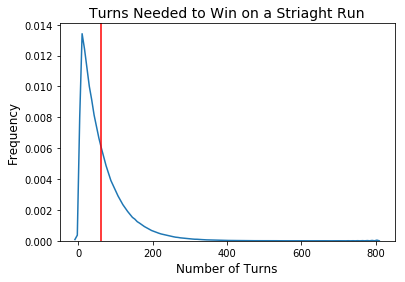

In [24]:
straight_games = []

# Simulate 1,000,000 tosses
for i in range(100000):
    straight_games.append(straight_run_sim())

plot_distribution(straight_games, "Turns Needed to Win on a Striaght Run")

In [19]:
statistics.mean(straight_games)

62.38732

In [52]:
# Get counts of each score
ctr = collections.Counter(straight_games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(len(ctr)))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
35,1,1664,0.001664
36,2,1635,0.001635
25,3,1618,0.001618
7,5,1502,0.001502
22,6,1499,0.001499
5,4,1486,0.001486
71,9,1462,0.001462
16,7,1413,0.001413
3,10,1369,0.001369
18,11,1339,0.001339


In [25]:
statistics.mean(straight_games)

62.307541

In [26]:
prob_below(straight_games, 6)

7.9673

In [27]:
prob_below(straight_games, 10)

13.712299999999999

### Toss just once per turn 

In [9]:
def one_roll_sim():
    
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1

    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 

        while roll_counter < 1: 

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        total_score = -50
                        roll_counter += 1
                    else: 
                        total_score = 0
                        roll_counter += 1
                else: # do not increment roll_counter
                    dub_counter += 1
                    roll_score = roll_score + (dice_one + dice_two) * 2
                    if dub_counter == 3: #unless it's your third double 
                        total_score = 0
                        roll_counter += 1
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                roll_counter += 1
            else: 
                roll_score = roll_score + (dice_one + dice_two) #if you rolled roll_score not 0
                roll_counter += 1

        turn_counter += 1
        total_score += roll_score 
        
        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1

    return(turn_counter)

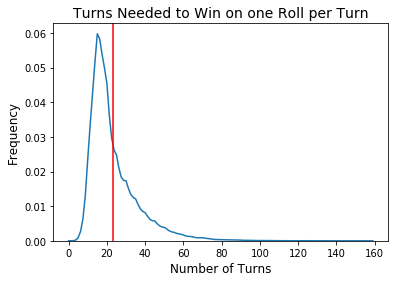

In [10]:
one_roll_games = []

# Simulate 100,000 tosses
for i in range(100000):
    one_roll_games.append(one_roll_sim())

plot_distribution(one_roll_games, 'Turns Needed to Win on one Roll per Turn')


In [15]:
statistics.mean(one_roll_games)
prob_below(one_roll_games, 6)
prob_below(one_roll_games, 10)


2.863

In [80]:
# Get counts of each score
ctr = collections.Counter(one_roll_games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(len(ctr)))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
6,20,60414,0.060414
9,19,59312,0.059312
24,21,55639,0.055639
11,18,54241,0.054241
2,22,48651,0.048651
4,17,43520,0.043520
8,23,41514,0.041514
0,24,34758,0.034758
21,16,29666,0.029666
18,25,28999,0.028999


In [88]:
statistics.mean(one_roll_games)
#min(one_roll_games)

32.74618

### Multi-Toss Turns

In [29]:
def multi_roll_turn(n):
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1
    dub_flag = False
    
    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 

        while roll_counter < n or dub_flag == True: 
            
            # Reset dub_flag
            dub_flag= False 
            
            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        roll_score = 0
                        total_score = -50
                        roll_counter = n
                    else: 
                        roll_score = 0
                        total_score = 0
                        roll_counter = n
                else: 
                    dub_counter += 1
                    roll_counter += 1 

                    if roll_counter == n: # you have to roll again on doubles 
                        roll_counter -= 1 

                    roll_score = roll_score + (dice_one + dice_two) * 2
                    if dub_counter == 3: # wipe turn if 3rd double  
                        total_score = 0
                        roll_counter = n
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                roll_counter = n
            else: 
                roll_score = roll_score + (dice_one + dice_two) 
                roll_counter += 1

        turn_counter += 1
        total_score += roll_score 

        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
    
    return (turn_counter)


## Multi Roll Turn with better dub logic 

In [15]:
def multi_roll_turn(n):
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1
    dub_flag = False
    
    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 
        dub_flag = False 

        while roll_counter < n or dub_flag == True: 
            
            # Checks for roll_score + total score  
            if roll_score + total_score == 100: 
                break
            
            if (roll_score + total_score > 100) and (dub_flag == False): 
                break 
            
            # Reset dub_flag
            dub_flag= False 
            
            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        roll_score = 0
                        total_score = -50
                        break
                    else: 
                        roll_score = 0
                        total_score = 0
                        break
                else: 
                    dub_flag = True
                    dub_counter += 1
                    roll_counter += 1 

                    if roll_counter == n: # you have to roll again on doubles 
                        roll_counter -= 1 

                    roll_score = roll_score + (dice_one + dice_two) * 2
                    
                    if dub_counter == 3: # wipe turn if 3rd double  
                        total_score = 0
                        roll_score = 0
                        break
                        
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                break
            else: 
                roll_score = roll_score + (dice_one + dice_two) 
                roll_counter += 1

        turn_counter += 1
        total_score += roll_score 

        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
    
    return (turn_counter)


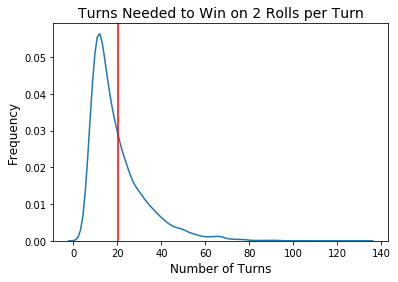

20.1031

In [18]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(10000):
    multi_roll_games.append(multi_roll_turn(2))

# Plot 
plot_distribution(multi_roll_games, 
                  'Turns Needed to Win on 2 Rolls per Turn')

# Mean
statistics.mean(multi_roll_games)

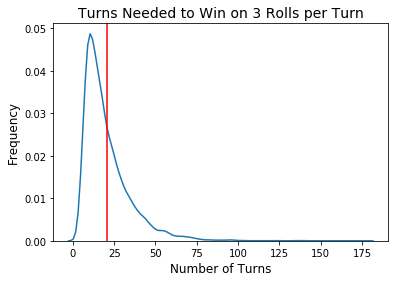

20.5127

In [11]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(10000):
    multi_roll_games.append(multi_roll_turn(3))
    
# Plot
plot_distribution(multi_roll_games, 
                  'Turns Needed to Win on 3 Rolls per Turn')

# Mean
statistics.mean(multi_roll_games)

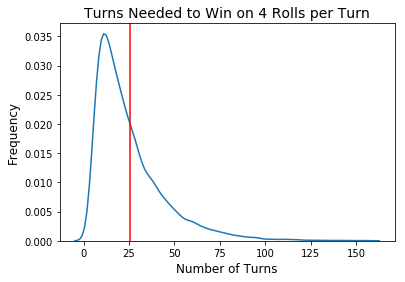

25.2798

In [12]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(10000):
    multi_roll_games.append(multi_roll_turn(4))
    
# Plot
plot_distribution(multi_roll_games, 
                  'Turns Needed to Win on 4 Rolls per Turn')

# Mean
statistics.mean(multi_roll_games)

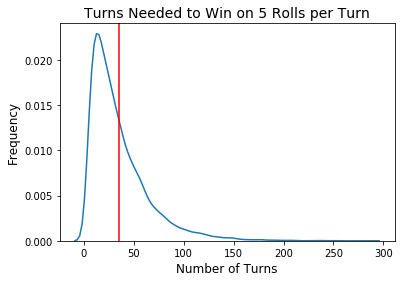

35.3836

In [13]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(10000):
    multi_roll_games.append(multi_roll_turn(5))
    
# Plot 
plot_distribution(multi_roll_games, 
                  'Turns Needed to Win on 5 Rolls per Turn')

# Mean
statistics.mean(multi_roll_games)

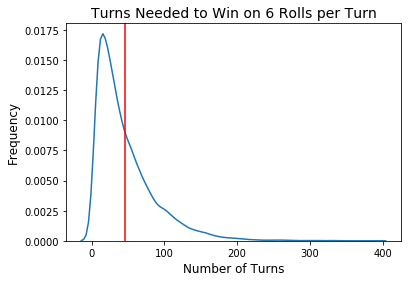

46.3983

In [14]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(10000):
    multi_roll_games.append(multi_roll_turn(6))

plot_distribution(multi_roll_games, 
                  "Turns Needed to Win on 6 Rolls per Turn")


statistics.mean(multi_roll_games)

## Multi Roll Turns 2 to 10

In [235]:
mean_container = []


for n in range(2,11):
    
    game_container = []
    
    for i in range(10000):
        game_container.append(multi_roll_turn(n))
    
    mean_container.append(statistics.mean(game_container))

    
mean_container
        
        

[18.01946,
 18.55977,
 21.36783,
 26.18597,
 31.9147,
 42.76197,
 57.84974,
 72.91506,
 85.79486]

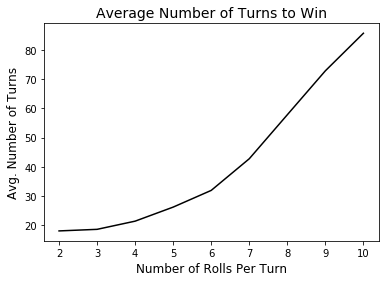

In [253]:
plt.plot(range(2,11), mean_container, color = 'black')
plt.title("Average Number of Turns to Win", fontsize = 14)
plt.xlabel("Number of Rolls Per Turn", fontsize=12)
plt.ylabel("Avg. Number of Turns", fontsize=12)
plt.show()

If you're following the strategy where you just roll n times per turn no matter what, the optimal number of rolls is 2. It has the lowest average number of turns to win at 18.02, barely edging out 3 rolls per turn with 18.56. 

99.991

In [33]:
meta_container = []


for n in range(2,11):
    game_container = []
    
    for i in range(100000):
        game_container.append(multi_roll_turn(n))
    
    print(str(n))
    meta_container.append(game_container)



2
3
4
5
6
7
8
9
10


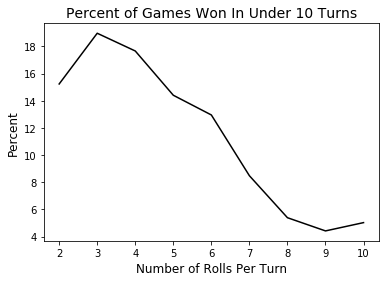

In [34]:
below_10_rolls = []

for data in meta_container: 
    below_10_rolls.append(prob_below(data, 10))
    
plt.plot(range(2,11), below_10_rolls, color = 'black')
plt.title("Percent of Games Won In Under 10 Turns", fontsize = 14)
plt.xlabel("Number of Rolls Per Turn", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.show()

## Turn Score Threshold Strategy 

In [5]:
def score_threshold(threshold):

    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1
    dub_flag = False

    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 

        while roll_score < threshold or dub_flag == True: 
            
            # Checks for roll_score + total score  
            if roll_score + total_score == 100: 
                break
            
            if (roll_score + total_score > 100) and (dub_flag == False): 
                break 
            
            # Reset Dub Flag
            dub_flag = False 

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        roll_score = 0
                        total_score = -50
                        break
                        #dub_flag = False
                    else: 
                        roll_score = 0
                        total_score = 0
                        break
                        #dub_flag = False
                else: 
                    dub_counter += 1
                    dub_flag = True
                    roll_counter += 1 

                    roll_score = roll_score + (dice_one + dice_two) * 2

                    if dub_counter == 3: # wipe turn if 3rd double  
                        total_score = 0
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                break
            else: 
                roll_score = roll_score + (dice_one + dice_two) 
                dub_flag = False 
                
                

        turn_counter += 1
        total_score += roll_score 



        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
    
    return(turn_counter)



In [6]:
import datetime 

meta_container = []
game_container = []

base_time = datetime.datetime.now()

for i in range(5, 76):
    game_container = []
    
    for k in range(5000): 
        game_container.append(score_threshold(i))
    
    print(str(i) + " took this long: " + str(datetime.datetime.now() - base_time)) 
    
    base_time = datetime.datetime.now()
    
    meta_container.append(game_container)
    

5 took this long: 0:00:00.538961
6 took this long: 0:00:00.586879
7 took this long: 0:00:00.608362
8 took this long: 0:00:00.563015
9 took this long: 0:00:00.617399
10 took this long: 0:00:00.622548
11 took this long: 0:00:00.659123
12 took this long: 0:00:00.646822
13 took this long: 0:00:00.632856
14 took this long: 0:00:00.672852
15 took this long: 0:00:00.731135
16 took this long: 0:00:00.702366
17 took this long: 0:00:00.744709
18 took this long: 0:00:00.755602
19 took this long: 0:00:00.753439
20 took this long: 0:00:00.825811
21 took this long: 0:00:00.828088
22 took this long: 0:00:00.802762
23 took this long: 0:00:00.807393
24 took this long: 0:00:00.776481
25 took this long: 0:00:00.852001
26 took this long: 0:00:00.948211
27 took this long: 0:00:00.922315
28 took this long: 0:00:00.975828
29 took this long: 0:00:01.000267
30 took this long: 0:00:01.042897
31 took this long: 0:00:01.054179
32 took this long: 0:00:01.087729
33 took this long: 0:00:01.054753
34 took this long: 

In [7]:
for i in meta_container:
    print("avg: " + str(statistics.mean(i)) 
                  + ", below 10: " 
                  + str(prob_below(i, 10))
                  + ", below 5: "
                  + str(prob_below(i, 5))
         )
    

avg: 24.3002, below 10: 2.7199999999999998, below 5: 0.02
avg: 23.459, below 10: 3.08, below 5: 0.02
avg: 23.0422, below 10: 4.64, below 5: 0.0
avg: 21.5294, below 10: 6.68, below 5: 0.08
avg: 20.9054, below 10: 9.3, below 5: 0.1
avg: 20.2158, below 10: 11.44, below 5: 0.12
avg: 19.4552, below 10: 13.459999999999999, below 5: 0.12
avg: 19.6558, below 10: 14.399999999999999, below 5: 0.18
avg: 19.5224, below 10: 14.74, below 5: 0.18
avg: 19.0792, below 10: 17.16, below 5: 0.18
avg: 19.337, below 10: 16.78, below 5: 0.26
avg: 19.0356, below 10: 17.919999999999998, below 5: 0.42
avg: 19.3058, below 10: 17.86, below 5: 0.33999999999999997
avg: 19.3588, below 10: 19.259999999999998, below 5: 0.48
avg: 19.3678, below 10: 20.04, below 5: 0.5
avg: 19.7038, below 10: 19.34, below 5: 0.48
avg: 19.6748, below 10: 20.46, below 5: 0.66
avg: 19.6946, below 10: 21.34, below 5: 0.8
avg: 20.1618, below 10: 21.099999999999998, below 5: 0.88
avg: 19.7288, below 10: 20.84, below 5: 0.8200000000000001
avg:

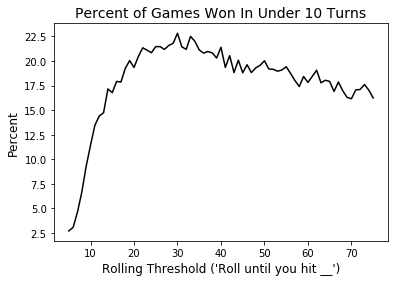

In [8]:
below_10_rolls = []

for data in meta_container: 
    below_10_rolls.append(prob_below(data, 10))
    
plt.plot(range(5,76), below_10_rolls, color = 'black')
plt.title("Percent of Games Won In Under 10 Turns", fontsize = 14)
plt.xlabel("Rolling Threshold ('Roll until you hit __')", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.show()

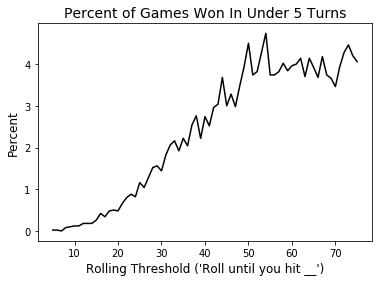

In [9]:
below_5_rolls = []

for data in meta_container: 
    below_5_rolls.append(prob_below(data, 5))
    
plt.plot(range(5,76), below_5_rolls, color = 'black')
plt.title("Percent of Games Won In Under 5 Turns", fontsize = 14)
plt.xlabel("Rolling Threshold ('Roll until you hit __')", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.show()

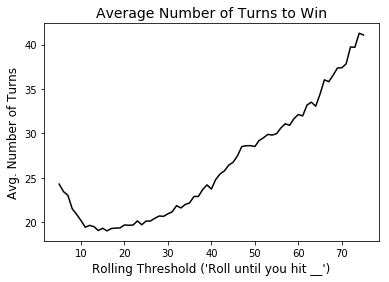

In [10]:
mean_container = []

for data in meta_container: 
    mean_container.append(statistics.mean(data))
    
plt.plot(range(5, 76), mean_container, color = 'black')
plt.title("Average Number of Turns to Win", fontsize = 14)
plt.xlabel("Rolling Threshold ('Roll until you hit __')", fontsize=12)
plt.ylabel("Avg. Number of Turns", fontsize = 12)
plt.show()

## TODO 

In [ ]:
# Problem with hitting 100 mid turn... done 

## problem is that if you have 90 points 
## and you roll 25 but the threshold is 50 
## you'll roll until you hit 50... 

In [ ]:
# Change doubles logic for multi roll turns 

# use the dub_flag 